<a href="https://colab.research.google.com/github/BalavSha/Deep-Learning/blob/main/Convolutional_Neural_Networks(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <center>Convolutional Neural Networks(CNNs)</center>

In [1]:
# code autocompletion extensions on google colab
# !pip install jupyter_contrib_nbextensions && jupyter contrib nbextension install --user && jupyter nbextension enable hinterland/hinterland

### Creating the First Layer to Build a CNN<br>
--> adding the first convolutional layer to the CNN model

In [2]:
# import libraries
import tensorflow as tf
tf.random.set_seed(8)

import pandas as pd
import numpy as np

Adding first Convolutional layer to the CNN model

In [3]:
from tensorflow.keras.layers import Dense, Conv2D

# initialize the CNN model
model = tf.keras.Sequential()

# define image shape
image_shape = (300, 300, 3)

# add first Convolutional layer to the model
model.add(Conv2D(filters=16, kernel_size=(3,3), 
                 input_shape=image_shape, 
                 activation="relu"))

In [4]:
# display the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
Total params: 448
Trainable params: 448
Non-trainable params: 0
_________________________________________________________________


### **Pooling Layer**

*   Max Pooling
*   Average Pooling

### Create a Pooling Layer for a CNN Model

In [5]:
# import libraries
import tensorflow as tf
tf.random.set_seed(8)

import pandas as pd
import numpy as np

In [6]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D

# define the image size
image_shape = (300, 300, 3)

# define the CNN model
model = tf.keras.Sequential()

# add Conv2D layer to the model
model.add(Conv2D(filters=16, kernel_size=(3,3), 
                 input_shape=image_shape,
                 activation="relu"))

# add MaxPool2D layer
model.add(MaxPool2D(pool_size=(2,2)))

In [7]:
# display model architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
Total params: 448
Trainable params: 448
Non-trainable params: 0
_________________________________________________________________


### **Flattening Layer**

### Building a CNN Model:
--> Implementing **Conv2D, MaxPool2D** & **Flatten** Layer <br>
--> Building **Human_Horse** Classifier

In [8]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing import image as kimage

In [9]:
# load the dataset from tensorflow_datasets package
(train_data, test_data), dataset_info = tfds.load("horses_or_humans",
                                                  split=["train", "test"],
                                                  data_dir="content/",
                                                  shuffle_files=True,
                                                  with_info=True
                                                  )

# ensure test_data is an instance of tf.data.Dataset
assert isinstance(test_data, tf.data.Dataset)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/1027 [00:00<?, ? examples/s]

Shuffling content/horses_or_humans/3.0.0.incompleteVXPQ6T/horses_or_humans-train.tfrecord*...:   0%|          …

Generating test examples...:   0%|          | 0/256 [00:00<?, ? examples/s]

Shuffling content/horses_or_humans/3.0.0.incompleteVXPQ6T/horses_or_humans-test.tfrecord*...:   0%|          |…

Dataset horses_or_humans downloaded and prepared to content/horses_or_humans/3.0.0. Subsequent calls will reuse this data.


In [10]:
# view info about the dataset
# get the shape of the images
image_shape = dataset_info.features["image"].shape
print(f"Shape of the Images:\t {image_shape}")

# number of classes in the dataset
num_classes = dataset_info.features["label"].num_classes
print(f"Number of classes: \t {num_classes}")

# name of classes in the dataset
class_names = dataset_info.features["label"].names
for name in class_names:
    print(f'Label for class "{name}": \t\t{dataset_info.features["label"].str2int(name)}')

Shape of the Images:	 (300, 300, 3)
Number of classes: 	 2
Label for class "horses": 		0
Label for class "humans": 		1


In [11]:
# view the number of images and distribution of classes in dataset
# Print the total number of examples in the training dataset
print(f'Total examples in Train Dataset: {len(train_data)}')

# Calculate the number of positive samples (humans) in the training dataset
pos_tr_samples = sum(i['label'] for i in train_data)

# Print the number of horses in the training dataset
print(f'Horses in Train Dataset: {len(train_data) - pos_tr_samples}')

# Print the number of humans in the training dataset
print(f'Humans in Train Dataset: {pos_tr_samples}')

# Print a newline character to separate output
print()

# Print the total number of examples in the test dataset
print(f'Total examples in Test Dataset: {len(test_data)}')

# Calculate the number of positive samples (humans) in the test dataset
pos_ts_samples = sum(i['label'] for i in test_data)

# Print the number of horses in the test dataset
print(f'Horses in Test Dataset: {len(test_data) - pos_ts_samples}')

# Print the number of humans in test dataset
print(f'Humans in Test Dataset: {pos_ts_samples}')

Total examples in Train Dataset: 1027
Horses in Train Dataset: 500
Humans in Train Dataset: 527

Total examples in Test Dataset: 256
Horses in Test Dataset: 128
Humans in Test Dataset: 128


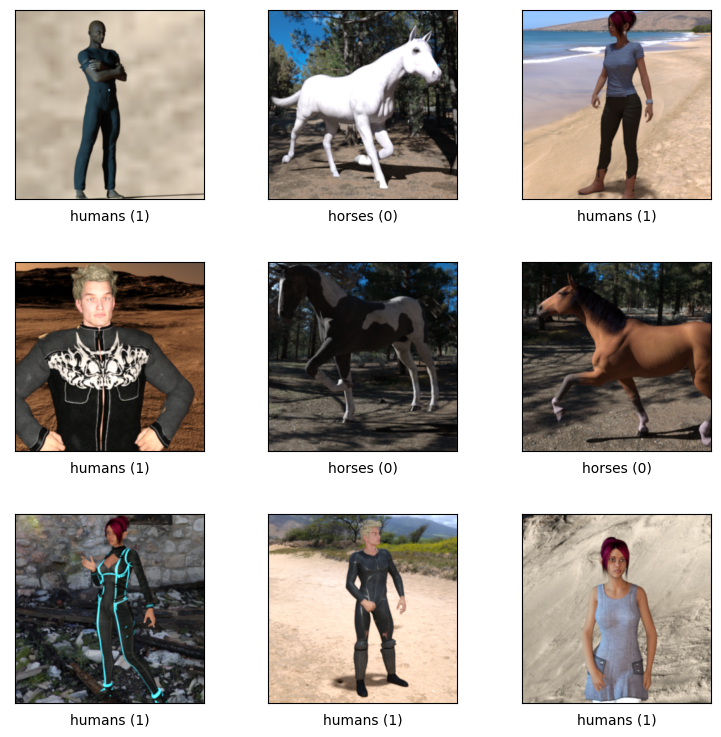

In [12]:
# view some sample images in the training dataset
fig = tfds.show_examples(train_data, dataset_info)

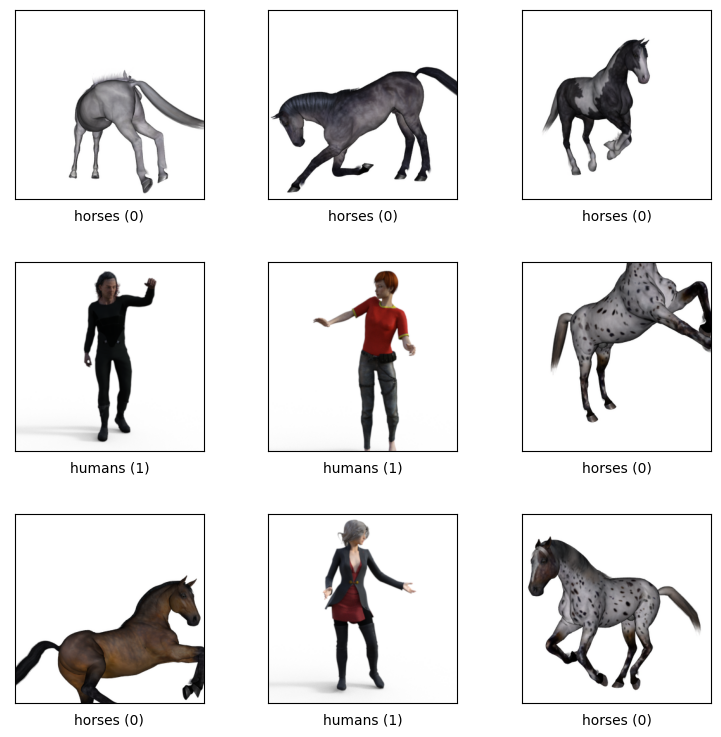

In [13]:
# view samples images in test dataset
fig = tfds.show_examples(test_data, dataset_info)

Create a CNN model:

In [14]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

# define the CNN sequential model
model = tf.keras.Sequential()

# add input layer/Conv2D layer to the model
model.add(Conv2D(filters=16, kernel_size=(3,3), input_shape=image_shape, activation="relu"))
# add a max Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))
# add another Conv2D layer
model.add(Conv2D(filters=32, kernel_size=(3,3), activation="relu"))
# add another Max Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))
# add Flatten layer to flatten output from previous layer
model.add(Flatten())
# add a Dense layer 
model.add(Dense(units=512, activation="relu"))

# add another Dense layer with one unit as output layer
model.add(Dense(units=1, activation="sigmoid"))

In [15]:
# compile the model
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              loss="binary_crossentropy",
              metrics=["acc"],
              loss_weights=None,
              weighted_metrics=None,
              run_eagerly=None,
              steps_per_execution=None)

In [16]:
# display the CNN model architecture
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 149, 149, 16)     0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 170528)            0         
                                                                 
 dense (Dense)               (None, 512)              

## **Image Augmentation**

In [17]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.preprocessing import image as kimage

#### Building a CNN with More ANN Layers

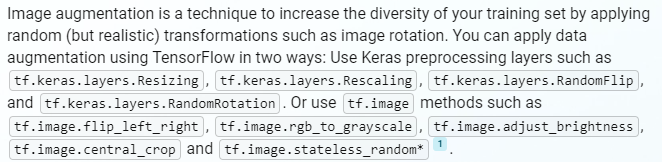

## **Batch Normalization**

#### Building a CNN with Additional Convolutional Layers. 
--> Implementing **Image Augmentation** & **Batch Normalization**

In [18]:
# import libraries
import tensorflow as tf
tf.random.set_seed(8)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [19]:
# load the dataset from tensorflow_datasets package
(train_data, test_data), dataset_info = tfds.load("horses_or_humans",
                                                  split=["train", "test"],
                                                  data_dir="content/",
                                                  shuffle_files=True,
                                                  with_info=True
                                                  )

# ensure test_data is an instance of tf.data.Dataset
assert isinstance(test_data, tf.data.Dataset)

Now, create a function for image transformation on train and test datasets:

In [20]:
from tensorflow.keras import layers

# create a normalization layer to rescale pixel values from [0, 255] to [0, 1]
normalization_layer = layers.Rescaling(1./255)

# apply normalization layer to the  'image' field of each element in train_data
train_data = train_data.map(
    lambda x: (normalization_layer(x['image']), x['label']),
    num_parallel_calls=tf.data.experimental.AUTOTUNE
)

# cache the dataset in memory for faster access
train_data = train_data.cache()

# shuffle the dataset
train_data = train_data.shuffle(len(train_data))

# batch the dataset into groups of 128 elements
train_data = train_data.batch(128)

# prefetch data for faster access
train_data = train_data.prefetch(tf.data.experimental.AUTOTUNE)

# # Apply the normalization layer to the 'image' field of each element in our_test_dataset
test_data = test_data.map(
    lambda x: (normalization_layer(x['image']), x['label']),
    num_parallel_calls=tf.data.experimental.AUTOTUNE
)

# cache the dataset in memory for faster access
test_data = test_data.cache()

# batch the dataset into groups of 32 elements
test_data = test_data.batch(32)

# prefetch data for faster access
test_data = test_data.prefetch(tf.data.experimental.AUTOTUNE)

In [21]:
# train the model with the training and test sets
history = model.fit(train_data,
                    validation_data=test_data,
                    epochs=15,
                    validation_steps=8,
                    verbose=1)

Epoch 1/15
9/9 [==============================] - 23s 365ms/step - loss: 12.4160 - acc: 0.5657 - val_loss: 2.1942 - val_acc: 0.5000
Epoch 2/15
9/9 [==============================] - 2s 213ms/step - loss: 0.7649 - acc: 0.6865 - val_loss: 1.2648 - val_acc: 0.5000
Epoch 3/15
9/9 [==============================] - 2s 207ms/step - loss: 0.3928 - acc: 0.8238 - val_loss: 0.6890 - val_acc: 0.6641
Epoch 4/15
9/9 [==============================] - 2s 198ms/step - loss: 0.2577 - acc: 0.8997 - val_loss: 1.1913 - val_acc: 0.6211
Epoch 5/15
9/9 [==============================] - 2s 205ms/step - loss: 0.3293 - acc: 0.8647 - val_loss: 0.6518 - val_acc: 0.7695
Epoch 6/15
9/9 [==============================] - 2s 213ms/step - loss: 0.1098 - acc: 0.9766 - val_loss: 1.8722 - val_acc: 0.5703
Epoch 7/15
9/9 [==============================] - 2s 225ms/step - loss: 0.0880 - acc: 0.9757 - val_loss: 1.1604 - val_acc: 0.7266
Epoch 8/15
9/9 [==============================] - 2s 261ms/step - loss: 0.0450 - acc: 0.

Take a batch from the test_data and plot the first image from the batch. Convert the image to an array, then use the model to predict what the image shows:

1/1 [==============================] - 0s 171ms/step
[[0.66137767]]
Image is a human


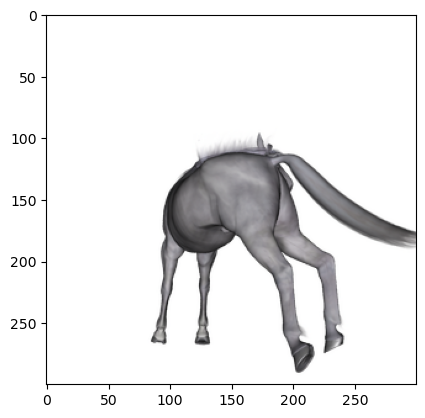

In [22]:
# Importing the necessary libraries
from matplotlib.pyplot import imshow
import numpy as np
from tensorflow.keras.preprocessing import image as kimage

# Taking the first image and label from the test dataset
for images, lables in test_data.take(1):

    # Displaying the image using Matplotlib's imshow() function
    imshow(np.asarray(images[0]))

    # Converting the image to an array to feed into the CNN model
    image_to_test = kimage.img_to_array(images[0])

    # Wrapping the image in a numpy array for compatibility with the CNN model
    image_to_test = np.array([image_to_test])

    # Making a prediction using the pre-trained CNN model
    prediction = model.predict(image_to_test)

    # Printing the prediction output
    print(prediction)

    # Checking if the predicted value is greater than 0.5, which is the threshold for the binary classification
    if prediction > 0.5:
        print("Image is a human")
    else:
        print("Image is a horse")


Let's take a look at what's happening with each successive layers in the model:

1/1 [==============================] - 0s 223ms/step


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in true_divide


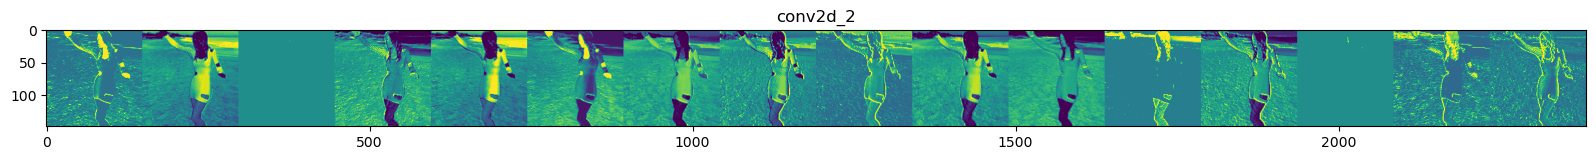

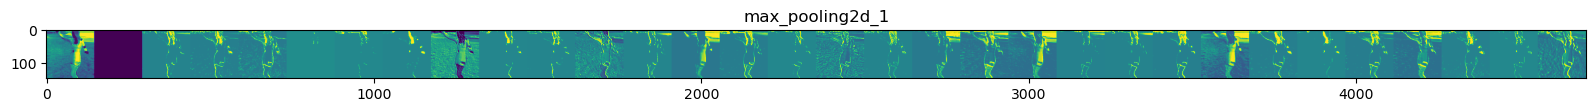

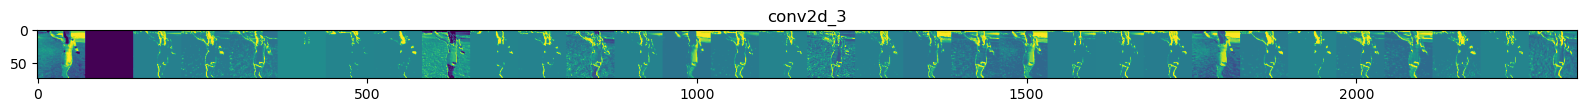

In [23]:
from keras.api._v2.keras import models
# Initialize an empty list to store the outputs of each layer
layer_outputs = []

# Loop through all layers except the first one (input layer)
for layer in model.layers[1:]:
    # Append the output of each layer to the list
    layer_outputs.append(layer.output)

# Initialize an empty list to store the names of each layer
layer_names = []

# Loop through all layers
for layer in model.layers:
    # Append the name of each layer to the list
    layer_names.append(layer.name)

# Create a new model that takes the input of our original CNN model and outputs the outputs of each layer
features_model = models.Model(inputs=model.input, outputs=layer_outputs)

# Take one random sample from our training dataset
random_sample = train_data.take(1)

# Use our new model to make predictions on this sample and get the output of each layer
layer_predictions = features_model.predict(random_sample)

# Loop through each layer name and its corresponding prediction
for layer_name, prediction in zip(layer_names, layer_predictions):
    # If the prediction does not have 4 dimensions (batch size, height, width, channels), skip this iteration
    if len(prediction.shape) != 4:
        continue

    # Get the number of features (channels) in this prediction
    num_features = prediction.shape[-1]

    # Get the size (height and width) of this prediction
    size = prediction.shape[1]

    # Initialize a grid with zeros to display all features side by side
    grid = np.zeros((size, size * num_features))

    # Loop through each feature (channel)
    for i in range(num_features):
        # Get this feature's image data (height x width)
        img = prediction[0, :, :, i]

        # Normalize this image data by subtracting its mean and dividing by its standard deviation,
        # then scaling it by 64 and adding 128. This will make sure that pixel values are between 0 and 255.
        img = ((((img - img.mean()) / img.std()) * 64) + 128)

        # Clip pixel values between 0 and 255 and convert them to unsigned integers (uint8)
        img = np.clip(img, 0, 255).astype('uint8')

        # Place this image data into its corresponding location on our grid
        grid[:, i * size: (i + 1) * size] = img

    # Calculate a scale factor for displaying images based on number of features (channels)
    scale = 20. / num_features

    # Create a new figure with appropriate size based on scale factor and number of features (channels)
    plt.figure(figsize=(scale * num_features, scale))

    # Set title for this figure as current layer's name
    plt.title(layer_name)

    # Display our grid as an image using matplotlib's imshow function.
    plt.imshow(grid)

# <center><b>Object Classification</b></center>

#### Building a CNN Model for Object Detection(**CIFAR-100** DATASET):

In [24]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar100
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix
import itertools

Load the **CIFAR-100** dataset from the tensorflow

In [25]:
import tensorflow_datasets as tfds

# load the CIFAR-100 dataset from tensorflow_datasets
train_data, test_data = tfds.load("cifar100",
                                 split=["train", "test"],
                                 shuffle_files=True,
                                  as_supervised=True
                                 )

# display the metadata of the dataset
info = tfds.builder("cifar100").info
print(info)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar100/3.0.2.incompleteBPBORS/cifar100-train.tfrecord*...:   0%|        …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cifar100/3.0.2.incompleteBPBORS/cifar100-test.tfrecord*...:   0%|         …

Dataset cifar100 downloaded and prepared to /root/tensorflow_datasets/cifar100/3.0.2. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='cifar100',
    full_name='cifar100/3.0.2',
    description="""
    This dataset is just like the CIFAR-10, except it has 100 classes containing 600 images each. There are 500 training images and 100 testing images per class. The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image comes with a "fine" label (the class to which it belongs) and a "coarse" label (the superclass to which it belongs).
    """,
    homepage='https://www.cs.toronto.edu/~kriz/cifar.html',
    data_path='/root/tensorflow_datasets/cifar100/3.0.2',
    file_format=tfrecord,
    download_size=160.71 MiB,
    dataset_size=132.03 MiB,
    features=FeaturesDict({
        'coarse_label': ClassLabel(shape=(), dtype=int64, num_classes=20),
        'id': Text(shape=(), dtype=string),
        'image': Image(shape=(32, 32, 3), dtype=uint8),
       